In [6]:
#####READ THIS FIRST
#Given the current sample size and analysis (boxplots), single family homes and town houses 
#show different relationships between natural elements within the photo and days on market. 
#This could be interesting to further explore with more categories and larger sample size.



library (readr)

urlfile="https://raw.githubusercontent.com/jdhl85/TDI/master/redfin_2020-08-02-13-19-53.csv"
JulyRestonSold<-read_csv(url(urlfile))

Parsed with column specification:
cols(
  .default = col_double(),
  `SALE TYPE` = col_character(),
  `SOLD DATE` = col_character(),
  `PROPERTY TYPE` = col_character(),
  ADDRESS = col_character(),
  CITY = col_character(),
  `STATE OR PROVINCE` = col_character(),
  LOCATION = col_character(),
  STATUS = col_character(),
  `NEXT OPEN HOUSE START TIME` = col_logical(),
  `NEXT OPEN HOUSE END TIME` = col_logical(),
  `URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)` = col_character(),
  SOURCE = col_character(),
  `MLS#` = col_character(),
  FAVORITE = col_character(),
  INTERESTED = col_character(),
  comments = col_character()
)

See spec(...) for full column specifications.



In [9]:
library(dplyr)

#process/clean data
JulyRestonSold = JulyRestonSold %>% drop_na(score) #remove rows that are not usable
JulyRestonSold[,2:9][is.na(JulyRestonSold[,2:9])] = 0 #NA's that should be zeros
JulyRestonSold=JulyRestonSold %>% mutate(front = ifelse(combo == 1, 0, front)) #make each location of picture taken mutually exclusive
JulyRestonSold=JulyRestonSold %>% mutate(back = ifelse(combo == 1, 0, back))
JulyRestonSold=JulyRestonSold %>% mutate(side = ifelse(combo == 1, 0, side))
JulyRestonSold=JulyRestonSold %>% mutate(inside = ifelse(combo == 1, 0, inside))
JulyRestonSold$backOrSide = JulyRestonSold$back +JulyRestonSold$side #combine side and back pictures to get reasonable sample size

#clean/codify property types
JulyRestonSold=JulyRestonSold %>% mutate(`PROPERTY TYPE` = ifelse(`PROPERTY TYPE` == "Other", "Single Family Residential", `PROPERTY TYPE`))
JulyRestonSold=JulyRestonSold %>% mutate(`PROPERTY TYPE` = ifelse(`PROPERTY TYPE` == "Single Family Residential", 0, 
                                                                  ifelse(`PROPERTY TYPE` == "Townhouse", 1, 2))) #0 sfh, 1 th, 2 condo
#re-categorize to low avg high
JulyRestonSold$scoreCat = ifelse(JulyRestonSold$score == 1 | JulyRestonSold$score == 2, 1,
                                 ifelse(JulyRestonSold$score == 3, 2, 3)) #1 low, 2 avg, 3 high
#take number of nature elements in picture
JulyRestonSold$numNat = JulyRestonSold$trees +JulyRestonSold$sky +JulyRestonSold$grass #counting how many nature elements there are in picture

#get better view of data to be used/further processed
#keep columns 5,6,7,8,9,13,15,16,20,21,22,24,27,28,41,42,43
JRS_inProg = JulyRestonSold[,c(5,6,7,8,9,13,15,16,20,21,22,24,27,28,41,42,43)]
JRS_inProg$priceDiff = JRS_inProg$PRICE - JRS_inProg$`redfin est`
JRS_inProg$scoreAvg = ifelse(JRS_inProg$scoreCat==2, 1,0)
JRS_inProg$scoreHigh = ifelse(JRS_inProg$scoreCat==3, 1,0)
JRS_inProg$Nat1 = ifelse(JRS_inProg$numNat==1, 1,0)
JRS_inProg$Nat2 = ifelse(JRS_inProg$numNat==2, 1,0)
JRS_inProg$Nat3 = ifelse(JRS_inProg$numNat==3, 1,0)
#will not use condo data since it seems a bit harder to produce quality pictures of condos
JRS_inProg = subset(JRS_inProg, JRS_inProg$`PROPERTY TYPE` != 2)

#create sets for sfh and th, and remove unnecessary columns
cols4days= c("DAYS ON MARKET","backOrSide","inside","combo","trees","sky","grass","scoreAvg","scoreHigh")
JRS_days= subset(JRS_inProg, select = cols4days)
singleFamHomes = subset(JRS_inProg,JRS_inProg$`PROPERTY TYPE`==0)
sfh_days= subset(singleFamHomes, select = cols4days)
townHomes = subset(JRS_inProg,JRS_inProg$`PROPERTY TYPE`==1)
th_days= subset(townHomes, select = cols4days)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




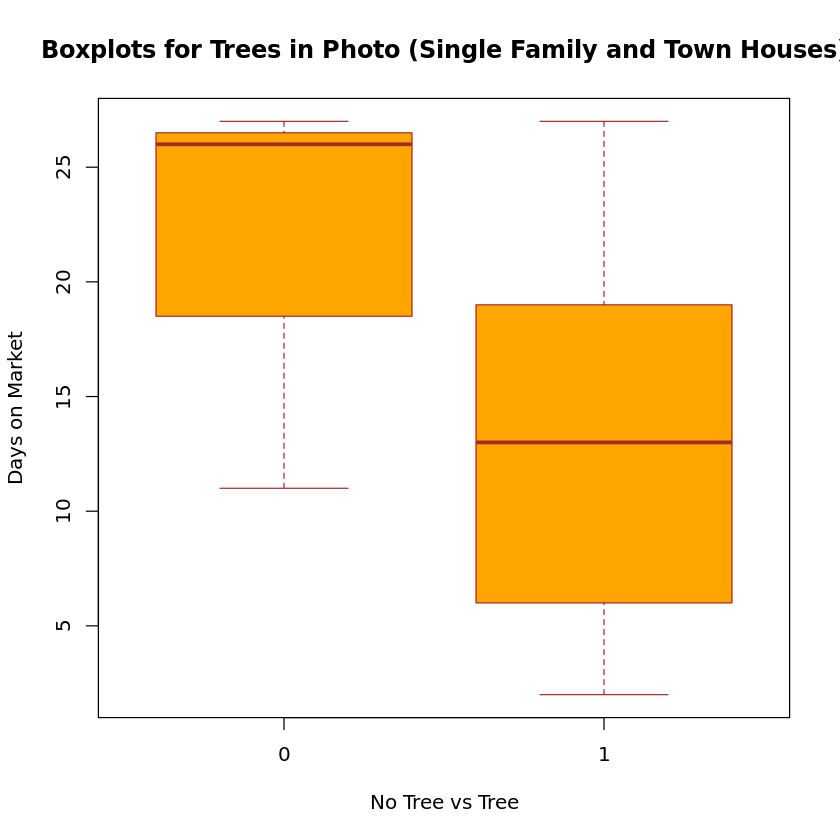

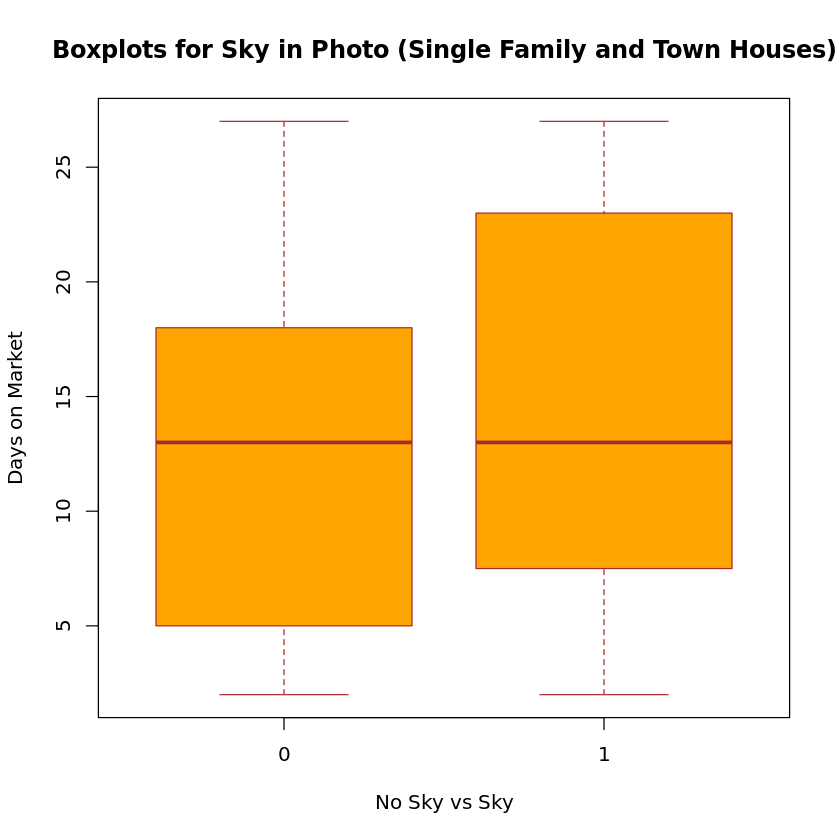

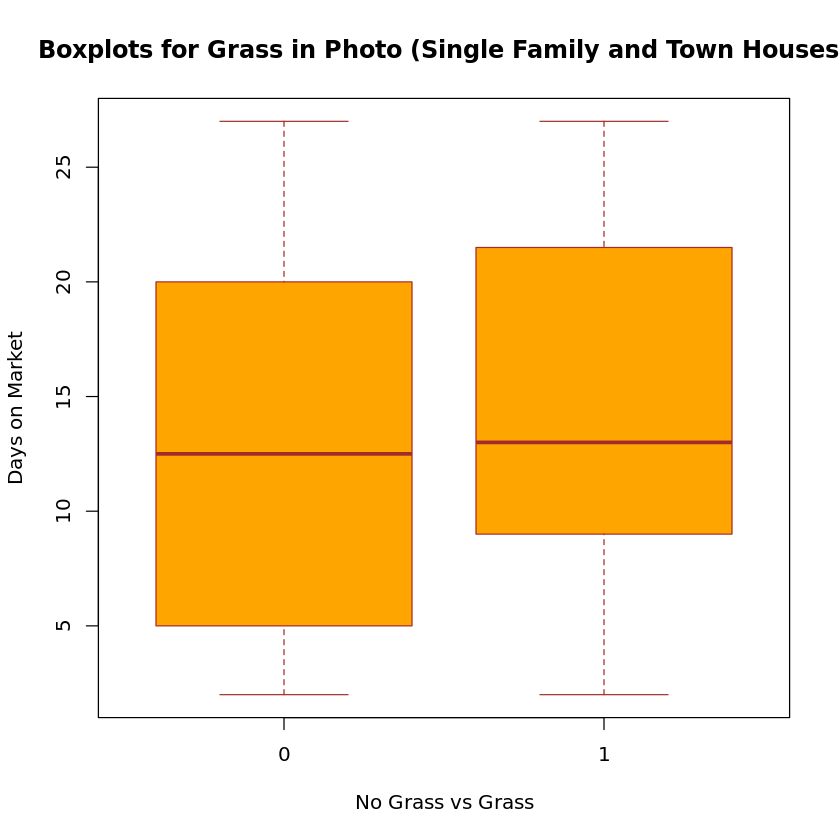

In [10]:
#EDA boxplots for single family and town houses
boxplot(JRS_inProg$`DAYS ON MARKET`~JRS_inProg$trees, data = JRS_inProg,
        main="Boxplots for Trees in Photo (Single Family and Town Houses)",
        xlab="No Tree vs Tree",
        ylab="Days on Market",
        col="orange",
        border="brown")
boxplot(JRS_inProg$`DAYS ON MARKET`~JRS_inProg$sky, data = JRS_inProg,
        main="Boxplots for Sky in Photo (Single Family and Town Houses)",
        xlab="No Sky vs Sky",
        ylab="Days on Market",
        col="orange",
        border="brown")
boxplot(JRS_inProg$`DAYS ON MARKET`~JRS_inProg$grass, data = JRS_inProg,
        main="Boxplots for Grass in Photo (Single Family and Town Houses)",
        xlab="No Grass vs Grass",
        ylab="Days on Market",
        col="orange",
        border="brown")

#When considering both single family and town houses, you can see that listings with trees in the photograph have shorter days on market

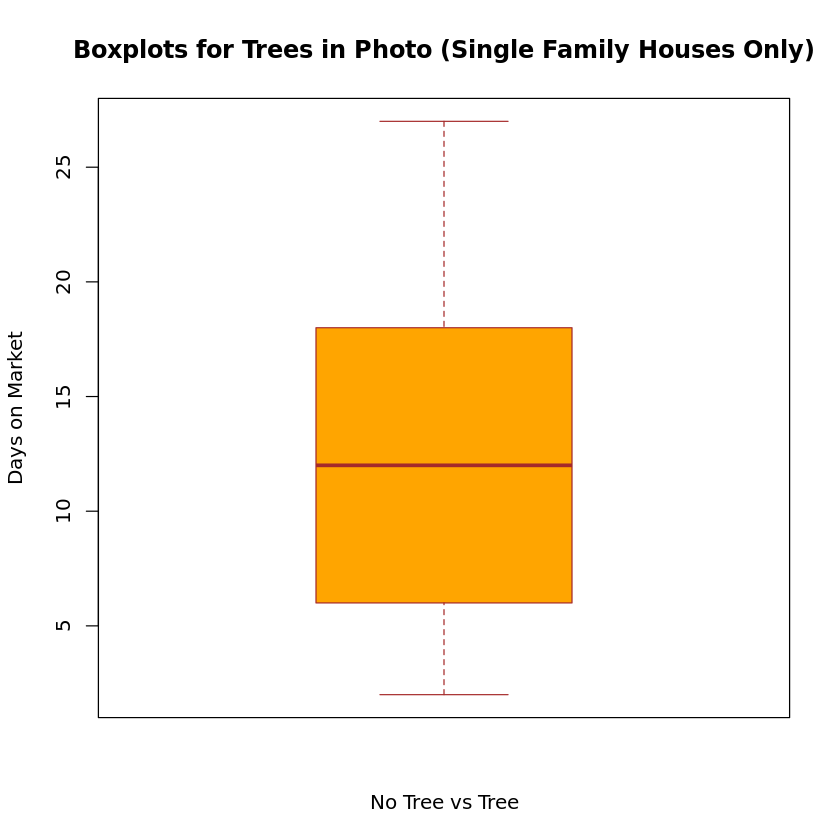

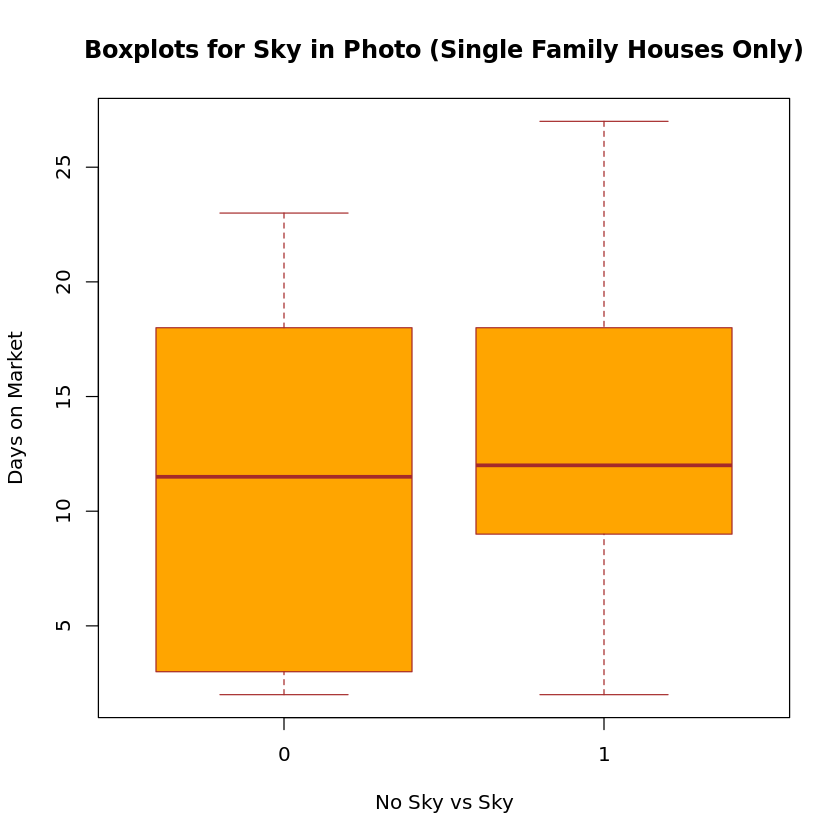

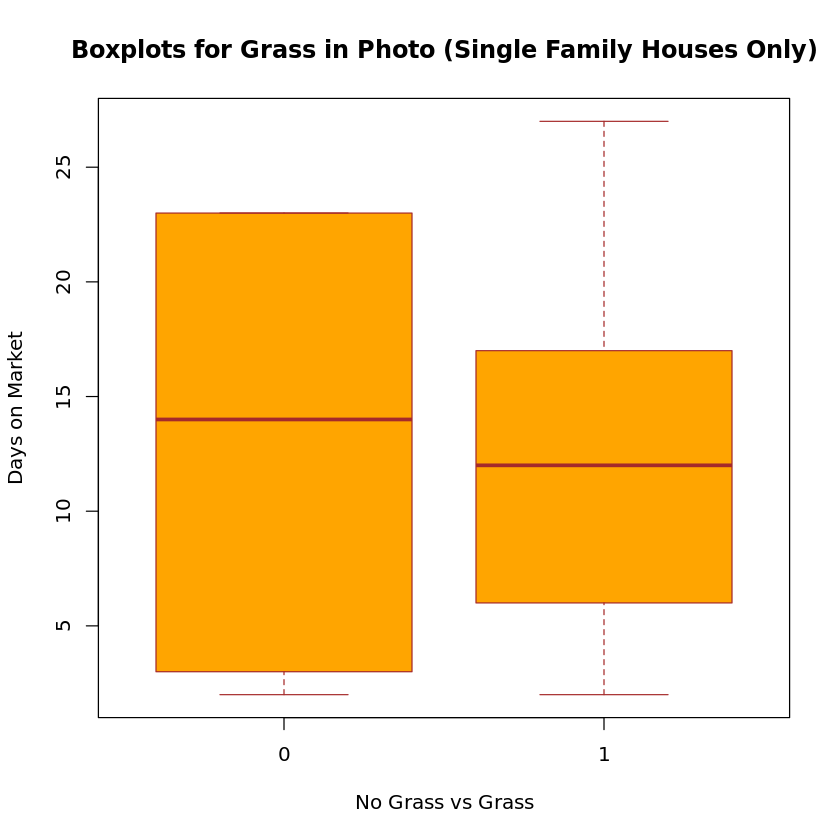

In [11]:
#EDA boxplots for single family houses
boxplot(sfh_days$`DAYS ON MARKET`~sfh_days$trees, data = sfh_days,
        main="Boxplots for Trees in Photo (Single Family Houses Only)",
        xlab="No Tree vs Tree",
        ylab="Days on Market",
        col="orange",
        border="brown")
boxplot(sfh_days$`DAYS ON MARKET`~sfh_days$sky, data = sfh_days,
        main="Boxplots for Sky in Photo (Single Family Houses Only)",
        xlab="No Sky vs Sky",
        ylab="Days on Market",
        col="orange",
        border="brown")
boxplot(sfh_days$`DAYS ON MARKET`~sfh_days$grass, data = sfh_days,
        main="Boxplots for Grass in Photo (Single Family Houses Only)",
        xlab="No Grass vs Grass",
        ylab="Days on Market",
        col="orange",
        border="brown")

#for single family homes, all photos had trees in them
#listings that had grass/lawn in the photos sold faster

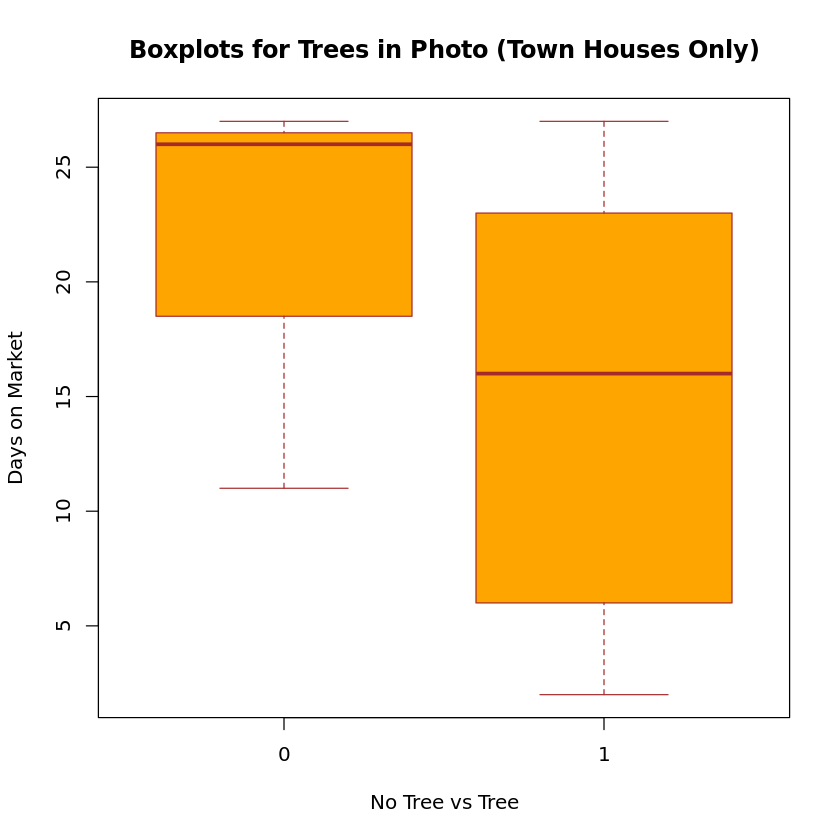

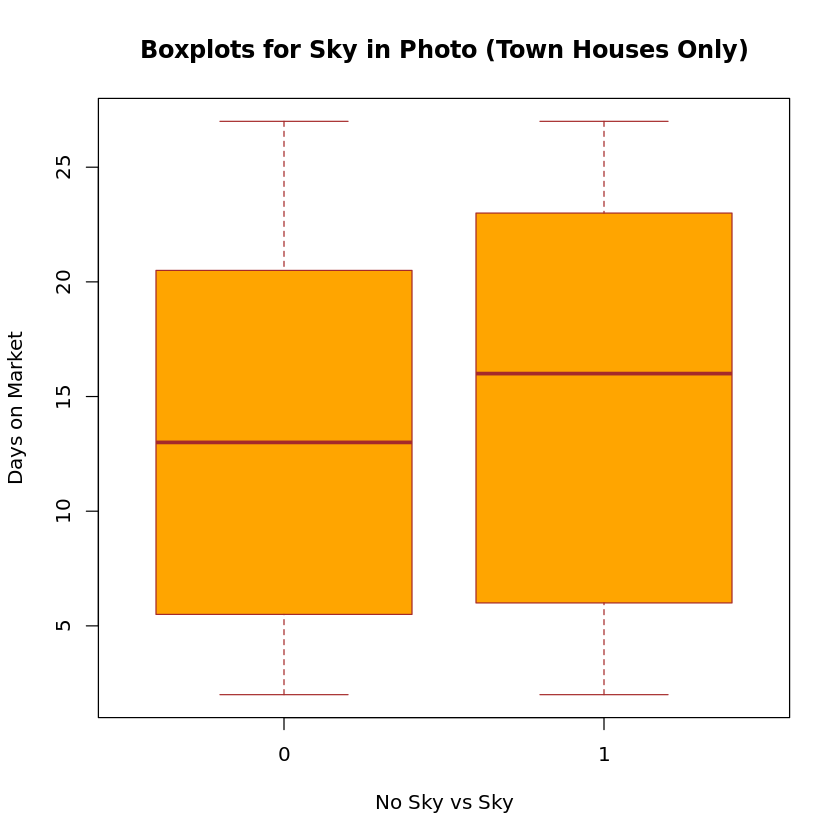

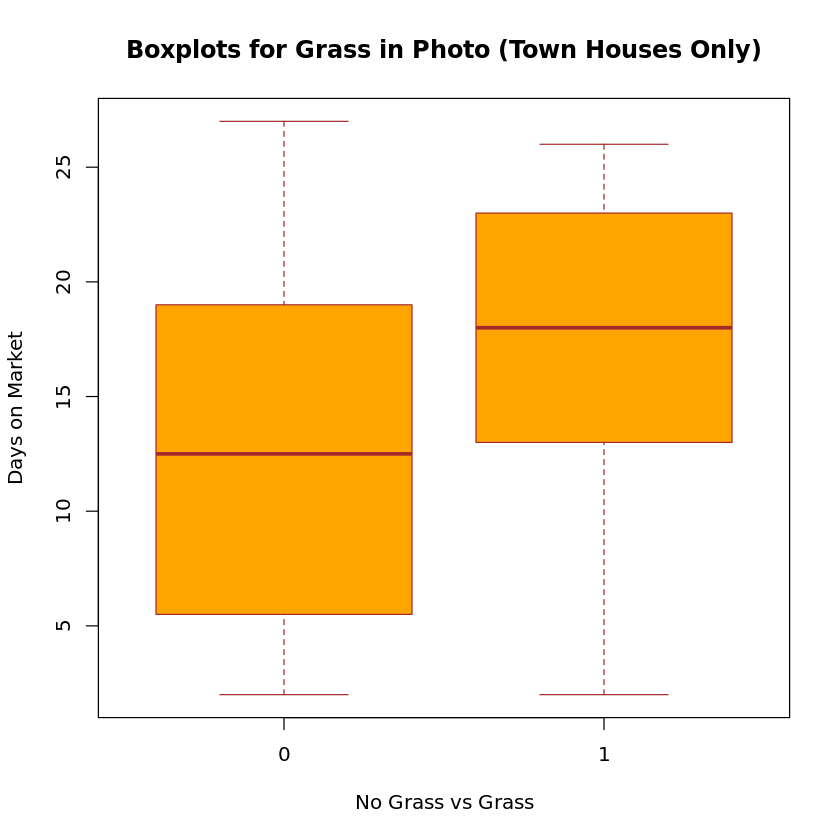

In [12]:
#EDA boxplots for town houses
boxplot(th_days$`DAYS ON MARKET`~th_days$trees, data = th_days,
        main="Boxplots for Trees in Photo (Town Houses Only)",
        xlab="No Tree vs Tree",
        ylab="Days on Market",
        col="orange",
        border="brown")
boxplot(th_days$`DAYS ON MARKET`~th_days$sky, data = th_days,
        main="Boxplots for Sky in Photo (Town Houses Only)",
        xlab="No Sky vs Sky",
        ylab="Days on Market",
        col="orange",
        border="brown")
boxplot(th_days$`DAYS ON MARKET`~th_days$grass, data = th_days,
        main="Boxplots for Grass in Photo (Town Houses Only)",
        xlab="No Grass vs Grass",
        ylab="Days on Market",
        col="orange",
        border="brown")

#for townhomes, listings with trees in photos sold faster, photos without the sky sold faster
#photos without grass sold faster